# ----x---- Product Recommendation ----x----

--------------------------------------------------------------------------------------------------------------------

Dataset Link - https://www.kaggle.com/datasets/irvifa/amazon-product-reviews

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import os
import importlib
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

In [8]:
# user-defined function to check library is installed or not, if not installed then it will install automatically at runtime.
def check_and_install_library(library_name):
    try:
        importlib.import_module(library_name)
        print(f"{library_name} is already installed.")
    except ImportError:
        print(f"{library_name} is not installed. Installing...")
        try:
            import pip
            pip.main(['install', library_name])
        except:
            print("Error: Failed to install the library. Please install it manually.")

In [9]:
if 'amazon-product-reviews' not in os.listdir():
  check_and_install_library('opendatasets')
  import opendatasets as od
  od.download('https://www.kaggle.com/datasets/irvifa/amazon-product-reviews')

In [10]:
#load the dataframe and set column name
dataset=pd.read_csv('path of your csv file',names=['userId', 'productId','rating','timestamp'])

In [11]:
dataset.shape

(7824482, 4)

In [12]:
dataset.columns

Index(['userId', 'productId', 'rating', 'timestamp'], dtype='object')

In [13]:
e_data=dataset.sample(n=1564896,ignore_index=True)

In [14]:
#after taking samples drop df to release the memory occupied by entire dataframe
del dataset

In [15]:
#print top 5 records of the dataset
e_data.head()

,userId,productId,rating,timestamp
0,AOBJ1Q85HLI1O,B00119T6NQ,5.0,1236556800
1,A2QO300UNDD6RE,B007Y61QV0,3.0,1370476800
2,A21I9UFX9P4MTV,B003DZ1684,5.0,1296000000
3,A20TUKI5YMQ9MI,B001W6Q6FY,1.0,1382832000
4,A2379DJ7GYLP8T,B002Y27P6O,1.0,1295222400


In [16]:
#print the concise information of the dataset
e_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564896 entries, 0 to 1564895
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1564896 non-null  object 
 1   productId  1564896 non-null  object 
 2   rating     1564896 non-null  float64
 3   timestamp  1564896 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 47.8+ MB


In [17]:
e_data.drop('timestamp',axis=1,inplace=True)

In [18]:
e_data.describe()

,rating
count,1.564896e+06
mean,4.012593e+00
std,1.380867e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [19]:
#handle missing values
e_data.isnull().sum()

userId       0
productId    0
rating       0
dtype: int64

In [20]:
#handling duplicate records
e_data[e_data.duplicated()].shape[0]

0

In [21]:
e_data.head()

,userId,productId,rating
0,AOBJ1Q85HLI1O,B00119T6NQ,5.0
1,A2QO300UNDD6RE,B007Y61QV0,3.0
2,A21I9UFX9P4MTV,B003DZ1684,5.0
3,A20TUKI5YMQ9MI,B001W6Q6FY,1.0
4,A2379DJ7GYLP8T,B002Y27P6O,1.0


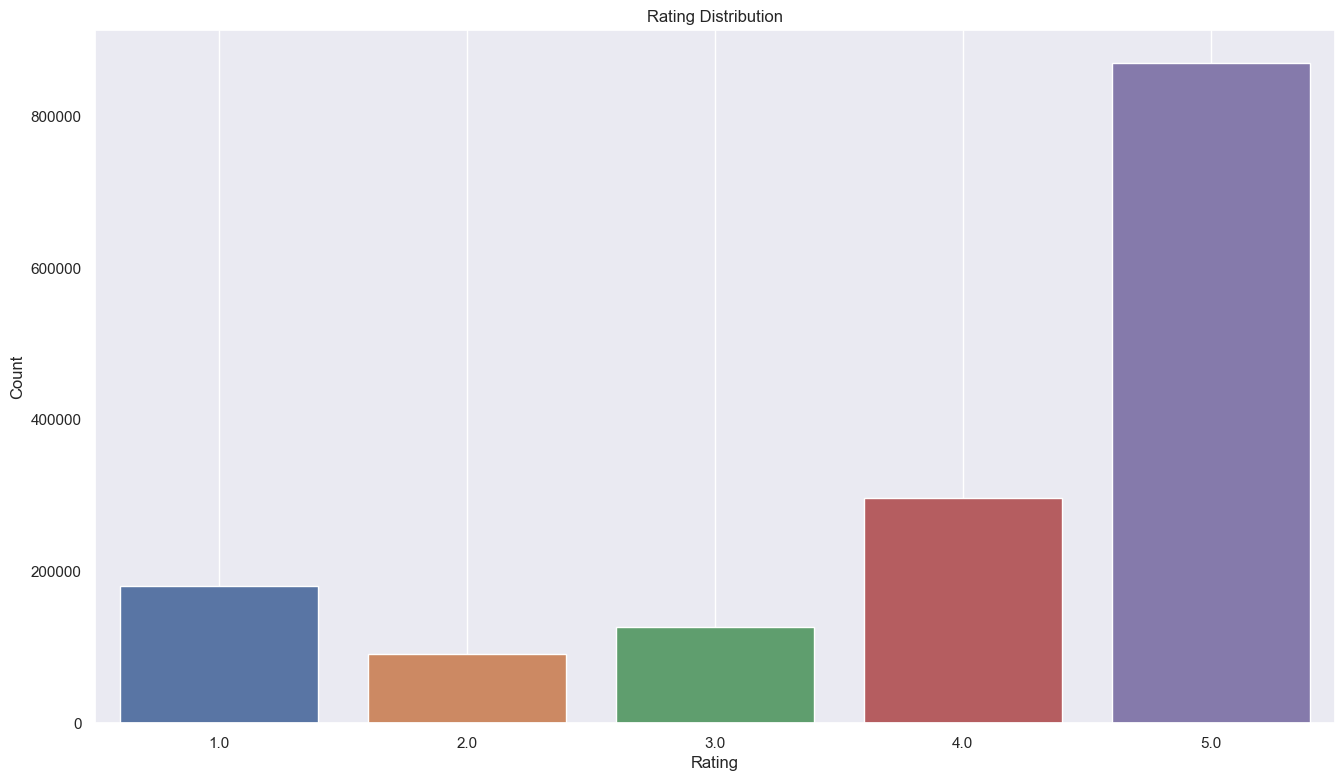

In [22]:
plt.figure(figsize=(16,9))
sns.countplot(x='rating',data=e_data)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid()
plt.show()

In [23]:
print('Total rating : ',e_data.shape[0])
print('Total unique users : ',e_data['userId'].unique().shape[0])
print('Total unique products : ',e_data['productId'].unique().shape[0])

Total rating :  1564896
Total unique users :  1226549
Total unique products :  237745


In [24]:
no_of_rated_products_per_user = e_data.groupby(by='userId')['rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

userId
A3OXHLG6DIBRW8    103
ADLVFFE4VBT8       99
A5JLAU2ARJ0BO      94
A6FIAB28IS79       77
A36K2N527TXXJN     77
Name: rating, dtype: int64

In [25]:
print('No of rated product more than 50 per user : {} '.format(sum(no_of_rated_products_per_user >= 50)))

No of rated product more than 50 per user : 21 


In [26]:
data=e_data.groupby('productId').filter(lambda x:x['rating'].count()>=50)

In [27]:
data.head()

,userId,productId,rating
0,AOBJ1Q85HLI1O,B00119T6NQ,5.0
2,A21I9UFX9P4MTV,B003DZ1684,5.0
4,A2379DJ7GYLP8T,B002Y27P6O,1.0
5,ALB2FGIX7SYMY,B004Z4FBE2,5.0
10,A3866HDI6HMH53,B003EWNXFU,5.0


In [28]:
no_of_rating_per_product=data.groupby('productId')['rating'].count().sort_values(ascending=False)

In [29]:
no_of_rating_per_product.head()

productId
B0074BW614    3661
B00DR0PDNE    3244
B007WTAJTO    2816
B006GWO5WK    2458
B0019EHU8G    2451
Name: rating, dtype: int64

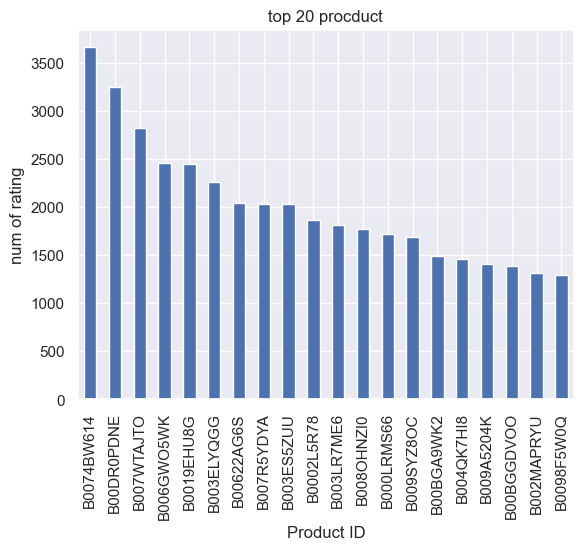

In [30]:
#top 20 product
no_of_rating_per_product.head(20).plot(kind='bar')
plt.xlabel('Product ID')
plt.ylabel('num of rating')
plt.title('top 20 procduct')
plt.show()

In [31]:
#average rating product
mean_rating_product_count=pd.DataFrame(data.groupby('productId')['rating'].mean())

In [32]:
mean_rating_product_count.head()

,rating
productId,
0972683275,4.621495
1400532655,3.757576
140053271X,3.947368
B00000DM9W,4.662162
B00000J061,4.100000


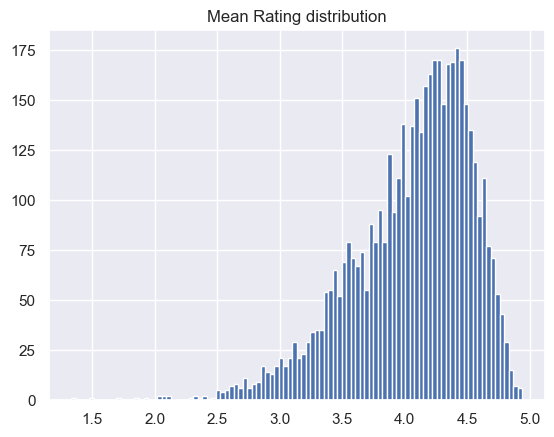

In [33]:
#plot the rating distribution of average rating product
plt.hist(mean_rating_product_count['rating'],bins=100)
plt.title('Mean Rating distribution')
plt.show()

In [34]:
#check the skewness of the mean rating data
mean_rating_product_count['rating'].skew()

-0.9285745430334152

In [35]:
mean_rating_product_count['rating_counts'] = pd.DataFrame(data.groupby('productId')['rating'].count())

In [36]:
mean_rating_product_count.head()

,rating,rating_counts
productId,,
0972683275,4.621495,214
1400532655,3.757576,99
140053271X,3.947368,76
B00000DM9W,4.662162,74
B00000J061,4.100000,60


In [37]:
#highest mean rating product
mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].max()]

,rating,rating_counts
productId,,
B0074BW614,4.509151,3661


In [38]:
#min mean rating product
print('min average rating product : ',mean_rating_product_count['rating_counts'].min())
print('total min average rating products : ',mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].min()].shape[0])

min average rating product :  50
total min average rating products :  112


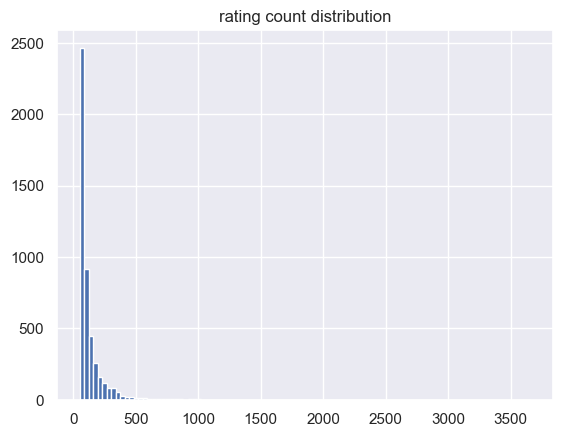

In [39]:
#plot the rating count of mean_rating_product_count
plt.hist(mean_rating_product_count['rating_counts'],bins=100)
plt.title('rating count distribution')
plt.show()

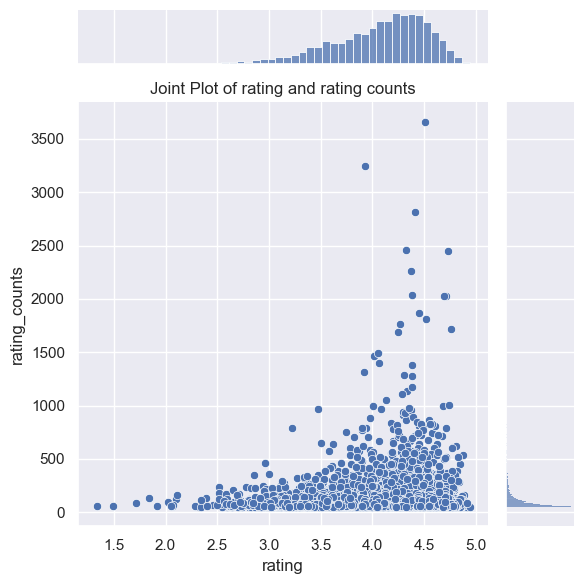

In [40]:
#joint plot of rating and rating counts
sns.jointplot(x='rating',y='rating_counts',data=mean_rating_product_count)
plt.title('Joint Plot of rating and rating counts')
plt.tight_layout()
plt.show()

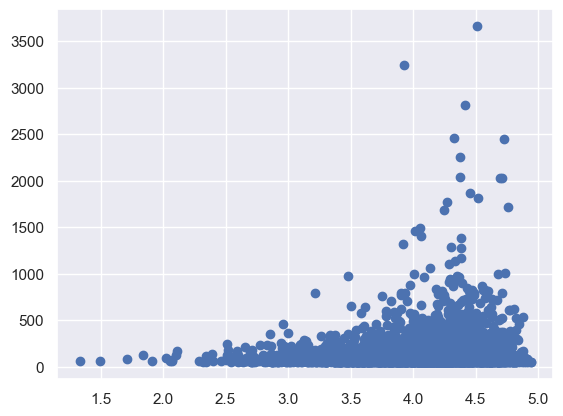

In [41]:
plt.scatter(x=mean_rating_product_count['rating'],y=mean_rating_product_count['rating_counts'])
plt.show()

In [42]:
print('Correlation between Rating and Rating Counts is : {} '.format(mean_rating_product_count['rating'].corr(mean_rating_product_count['rating_counts'])))

Correlation between Rating and Rating Counts is : 0.1140167351796743 


In [43]:
#import surprise library for collebrative filtering
check_and_install_library('surprise')
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

surprise is already installed.


In [44]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(data,reader)

In [45]:
#Splitting surprise the dataset into 80,20 ratio using train_test_split
trainset, testset = train_test_split(surprise_data, test_size=0.3,random_state=42)

In [46]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [47]:
#make prediction using testset
test_pred=algo.test(testset)

In [48]:
#print RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred ,verbose=True)

Item-based Model : Test Set
RMSE: 1.3118


1.3117974156248555

In [49]:
data2=data.sample(20000)
ratings_matrix = data2.pivot_table(values='rating', index='userId', columns='productId', fill_value=0)
ratings_matrix.head()

productId,0972683275,1400532655,140053271X,B00000DM9W,B00000J061,B00000J1V5,B00000JDF5,B00000K2YR,B00000K4KH,B00001OWYM,...,B00I2ZBD1U,B00I94IPTW,B00I9K3ZQ4,B00IDG3IDO,B00IF70QCW,B00INNP5VU,B00ISGCAJM,B00IT1WJZQ,B00IVPU786,B00IZBNQO8
userId,,,,,,,,,,,,,,,,,,,,,
A0125769YAYJYA1B5Y9B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01398202XBN23LWYQHT5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01408681ZFC50SWTCBVL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01596081YRGM6UKNW0Z8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01663101S4TUSD81AHV8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
#check the shape of the rating_matrix
ratings_matrix.shape

(19905, 4372)

In [51]:
#transpose the metrix to make column (productId) as index and index as column (userId)
x_ratings_matrix=ratings_matrix.T
x_ratings_matrix.head()

userId,A0125769YAYJYA1B5Y9B,A01398202XBN23LWYQHT5,A01408681ZFC50SWTCBVL,A01596081YRGM6UKNW0Z8,A01663101S4TUSD81AHV8,A02042832HVNS1BRBGFFT,A03541451A87X5FNV5K4H,A03621251INKKK9X82UZ8,A036229337Q1OHU0BSCIU,A0372063OSKBH23A8ABN,...,AZX1JTWFRK1NT,AZX7GJRLMWN92,AZXWC30AT28Y8,AZXX7L6ABGC06,AZXYT7ZNTL8P9,AZY1ORGM0S2CD,AZZJZQGBP0GNE,AZZLZUR5X9GYE,AZZS13C32YSPH,AZZWPNME0GQZ2
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400532655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140053271X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00000DM9W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00000J061,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
x_ratings_matrix.shape

(4372, 19905)

In [53]:
#Decomposition of the matrix using Singular Value Decomposition technique
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(x_ratings_matrix)
decomposed_matrix.shape

(4372, 10)

In [54]:
#Correlation Matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(4372, 4372)

In [55]:
x_ratings_matrix.index[25]

'B00004T8R2'

In [56]:
i="B00001P4ZH"
product_names=list(x_ratings_matrix.index)
product_id=product_names.index(i)
print(product_id)

11


In [57]:
correlation_product_ID = correlation_matrix[product_id]
correlation_product_ID.shape

(4372,)

In [58]:
correlation_matrix[correlation_product_ID>0.75].shape

(1207, 4372)

In [59]:
#Recommending top 20 highly correlated products in sequence
recommend = list(x_ratings_matrix.index[correlation_product_ID > 0.75])
recommend[:20]

['B00001OWYM',
 'B00001P4XA',
 'B00001P4ZH',
 'B00001W0DH',
 'B00004T1XE',
 'B00004THCZ',
 'B00004WCIC',
 'B00004WCID',
 'B00004ZCJE',
 'B0000510ZO',
 'B00005A1K1',
 'B00005BC0K',
 'B00005LEN4',
 'B00005NIMJ',
 'B00005T380',
 'B00005T3BD',
 'B00005T406',
 'B000063574',
 'B000066E6Y',
 'B000067RC4']